## ABALONE CASE STUDY - PRACTICE 4

### Problem Statement:
    The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

   #### Attribute Information

        Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

##### Name / Data Type / Measurement Unit / Description

    - Sex / nominal / -- / M, F, and I (infant)
    - Length / continuous / mm / Longest shell measurement
    - Diameter / continuous / mm / perpendicular to length
    - Height / continuous / mm / with meat in shell
    - Whole weight / continuous / grams / whole abalone
    - Shucked weight / continuous / grams / weight of meat
    - Viscera weight / continuous / grams / gut weight (after bleeding)
    - Shell weight / continuous / grams / after being dried
    - Rings / integer / -- / +1.5 gives the age in years.  (Target Variable)


####  Predict the rings of each abalone which will lead us to the age of that abalone. 


#### STEP 1: DATA PREPARATION

In [416]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [417]:
data = pd.read_csv('abalonedata.csv')

In [418]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [419]:
data.Rings.nunique()

28

   ####  Observations:
        28 UNiques values (Ring Number) for age prediction.

In [420]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<AxesSubplot:>

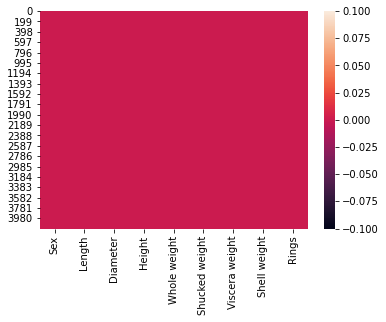

In [421]:
sb.heatmap(data.isnull())

   #### Observations:
       - NO NULL VALUES

## STEP2: EDA

            UNIVARIANTE ANALYSIS

Text(0.5, 1.0, 'Age of Abalone CAtegories/TArget Varialbe')

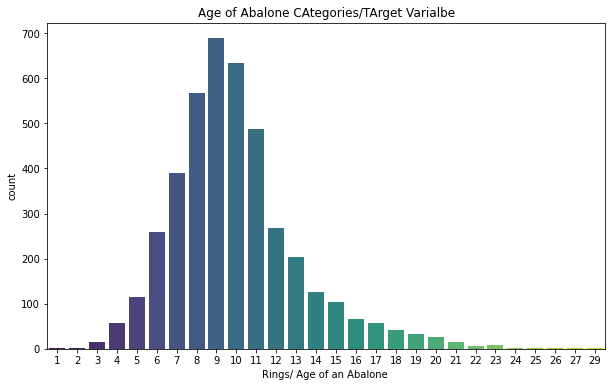

In [422]:
plt.figure(figsize=(10,6))
sb.countplot(data.Rings,palette='viridis')
plt.xlabel('Rings/ Age of an Abalone ')
plt.title('Age of Abalone CAtegories/TArget Varialbe')

Text(0.5, 1.0, 'Age of Abalone CAtegories/TArget Varialbe')

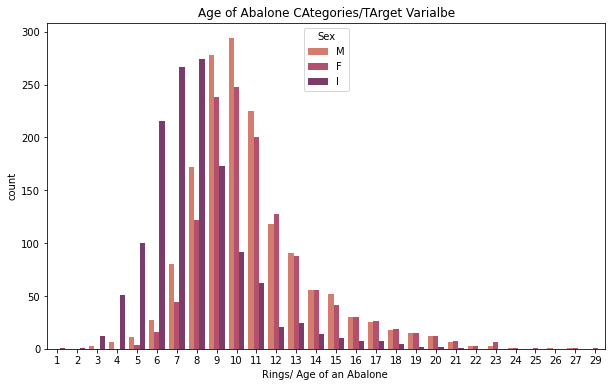

In [423]:
plt.figure(figsize=(10,6))
sb.countplot(data.Rings,palette='flare',hue=data.Sex)
plt.xlabel('Rings/ Age of an Abalone ')
plt.title('Age of Abalone CAtegories/TArget Varialbe')

#### OBSERVATIONS:
    - Number of Rings are high in number for the Range 6-13, with no of Rings with 9-10 bieng the Highest in CAtegory.
    - followes a gaussian like distribution and a little left skewed.
    - Infants have a different range for no of ring than male/females. In Which Females having highest no of rights .

([<matplotlib.axis.XTick at 0x1ff91de4f40>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female'), Text(2, 0, 'Infant')])

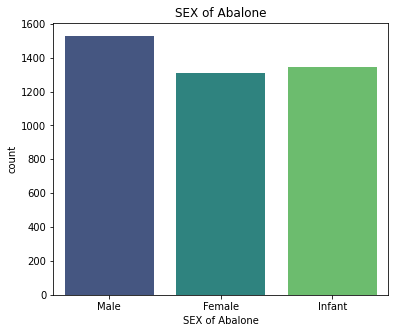

In [424]:
plt.figure(figsize=(6,5))
sb.countplot(data.Sex,palette='viridis')
plt.xlabel('SEX of Abalone')
plt.title('SEX of Abalone')
plt.xticks(ticks=[0,1,2],labels=['Male','Female','Infant'])


### OBservations:
    **Males are high in Number near 1500 Data Points, female and infants have same range between nearly 1300 datapoints**
    
    
#### DISTRIBUTION PLOTS

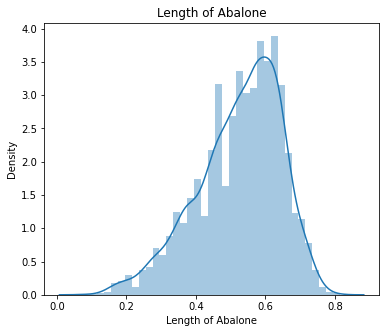

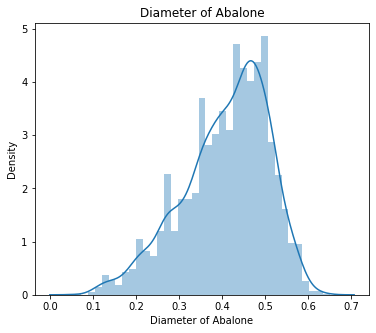

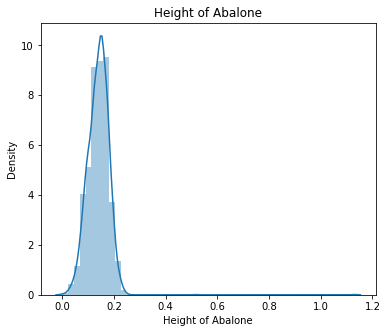

In [425]:
for i in data.columns[1:4]:
    plt.figure(figsize=(6,5))
    sb.distplot(data[i],kde=True)
    plt.xlabel(i+' of Abalone')
    plt.title(i+' of Abalone')

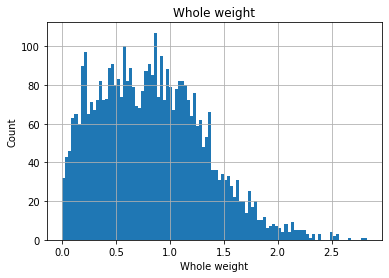

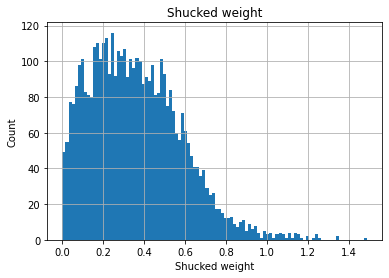

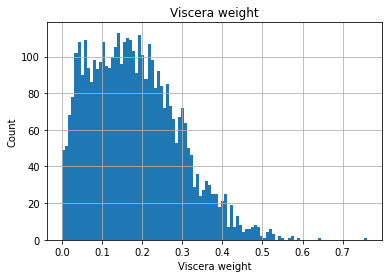

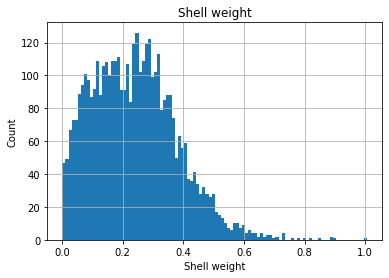

In [426]:
for i in data.columns[4:-1]:
    plt.figure()
    data[i].hist(bins=100)
    plt.xlabel(str(i))
    plt.ylabel('Count')
    plt.title(str(i))

#### Observations:
        - length, diameter is right skewed.
        - shell, viscera, shucked, whole weights, height are left skewed.
        


### BIVARIANTE ANALYSIS

([<matplotlib.axis.XTick at 0x1ff925a05e0>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female'), Text(2, 0, 'Infant')])

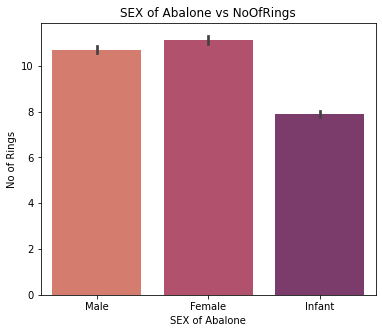

In [427]:
plt.figure(figsize=(6,5))
sb.barplot(data.Sex,data.Rings,palette='flare')
plt.xlabel('SEX of Abalone')
plt.ylabel('No of Rings')
plt.title('SEX of Abalone vs NoOfRings')
plt.xticks(ticks=[0,1,2],labels=['Male','Female','Infant'])

#### **OBservation**
    - In Infacts, No of Rings found is lower than MAle/Female. Infants have 7-8 rings on Average.

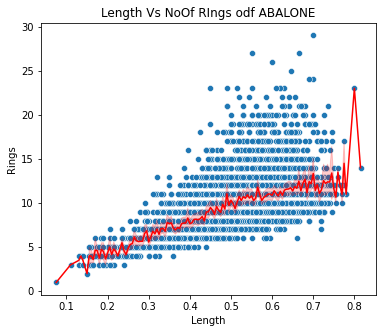

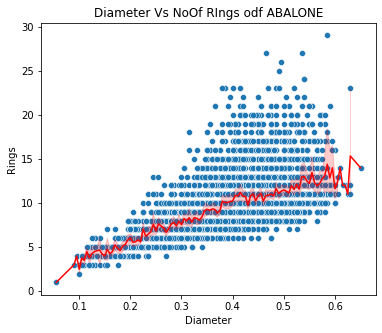

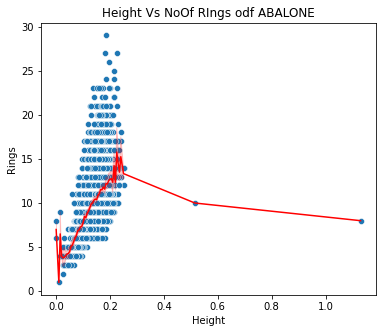

In [428]:
for i in data.columns[1:4]:
    plt.figure(figsize=(6,5))
    sb.scatterplot(data[i],data.Rings)
    sb.lineplot(data[i],data.Rings,color='r')
    plt.title(i+' Vs NoOf RIngs odf ABALONE')

##### OBSERVATIONS:
    - Observe a Funnel structure made in the graphs which is also called Heteroscedasticity which mean unequal scatter or non constant variance which means difference between the avg value on the linear line and actual data point is high and this varaince/bias increases with increasing value of rings and feature values.
    
    - Linear relationship is not noticed as due to absense of constast variance.
    
    - Height has some clear outliers

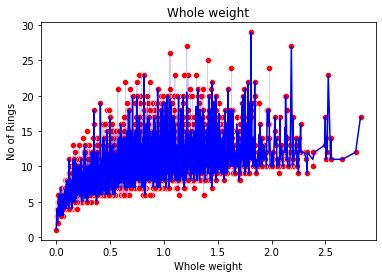

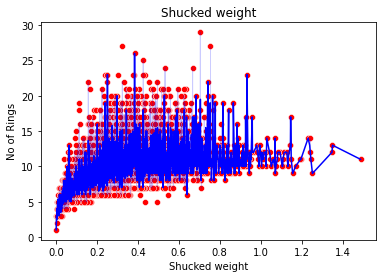

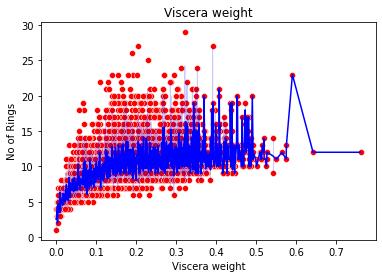

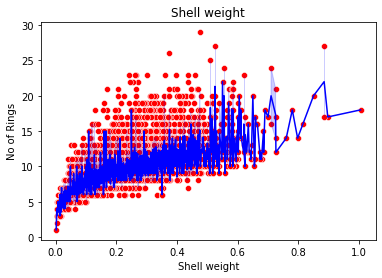

In [430]:
for i in data.columns[4:-1]:
    plt.figure()
    sb.scatterplot(data[i],data.Rings,color='r')
    sb.lineplot(data[i],data.Rings,color='b')
    plt.title(str(i)+'Vs NoOf RIngs odf ABALONE')
    plt.xlabel(str(i))
    plt.ylabel('No of Rings')
    plt.title(str(i))
    
    
  

#### Observations:

    - Heteroscedasticity is also observed here, meaning unequal scatter or not a constanst variance .
    - the data points are far away from the avg value and the distance between actual data point and the line points increases as the no of rings/ weights increases.
    

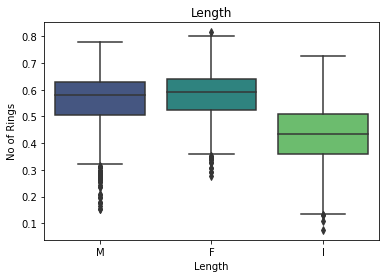

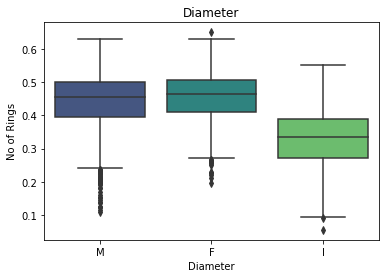

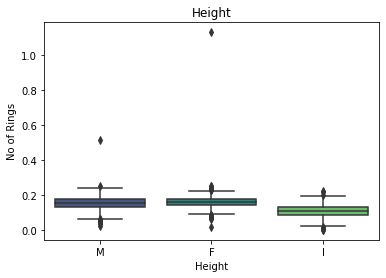

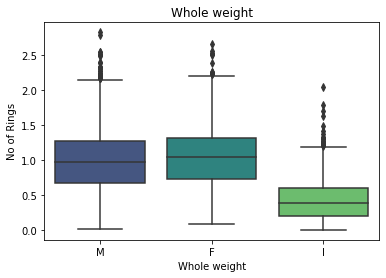

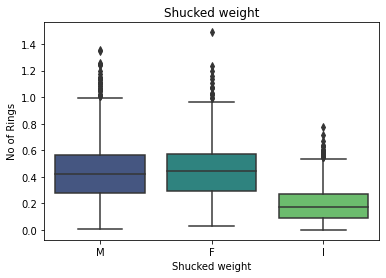

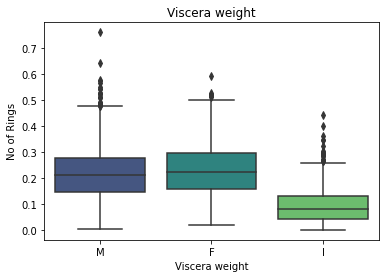

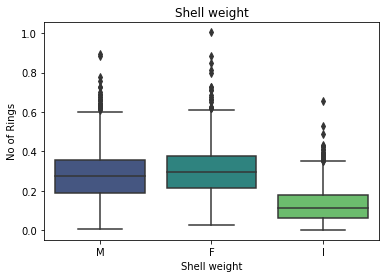

In [431]:
for i in data.columns[1:-1]:
    plt.figure()
    
    sb.boxplot(data.Sex,data[i],palette='viridis')
    plt.title(str(i)+'Vs NoOf RIngs odf ABALONE')
    plt.xlabel(str(i))
    plt.ylabel('No of Rings')
    plt.title(str(i))

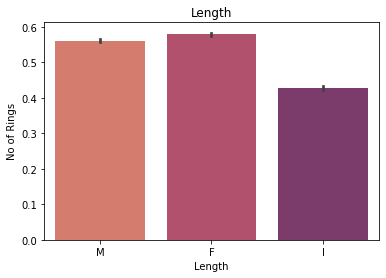

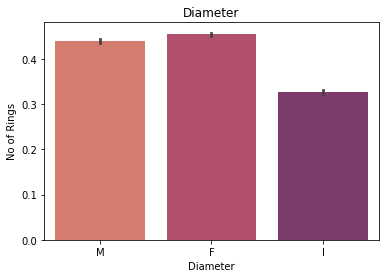

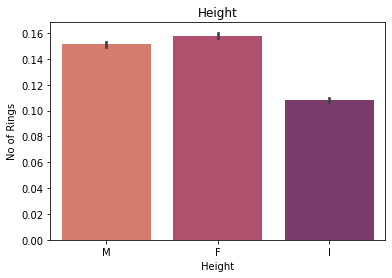

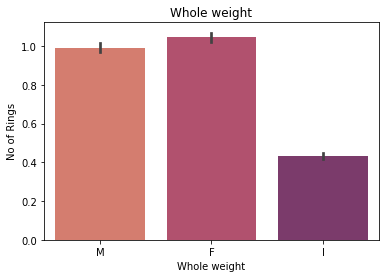

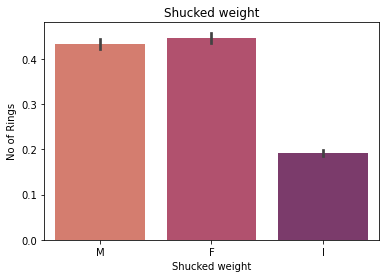

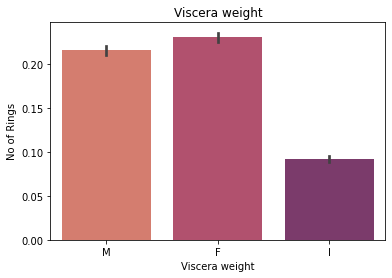

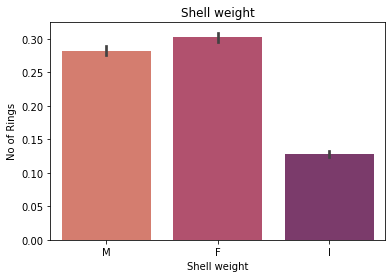

In [432]:
for i in data.columns[1:-1]:
    plt.figure()
    
    sb.barplot(data.Sex,data[i],palette='flare')
    plt.title(str(i)+'Vs NoOf RIngs odf ABALONE')
    plt.xlabel(str(i))
    plt.ylabel('No of Rings')
    plt.title(str(i))

#### **Observations:**
      1. WE Can Say Females have Highest Values with each of the Attributes, MAle has a significantly close to female but lower.
      2.INfants have the Lowest of every Attribute, we can significantly distinguish between INfants and Non Infacts  with these Wieghts.
      3. we Can Say all the other Features are Strong able to Distinguish between INfants and Non INfants
      4. From the Barplots you can see the Exact average Value for each SEX Category.

   ### NOTE
    -- Creating a New Column AS Infant=0 Or Adult= 1 as , MAle and Female Category have  Close Values with other Features including w.r.t to the Target Variable. WE can Merge Male/Female Groups as threy have close vlaues and have distinguishing high differences with INfants and is more Correlated than indivually with M,F,I
            

#### Feature Engineering
        - Creating a New column with combing M/F and Infant  for infant and not INfant 

In [433]:
data['Adult/Infannt '] = data['Sex'].apply(lambda x: 1 if (x=='M' or x=='F') else 0)

In [434]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Adult/Infannt
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,1
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,1
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1


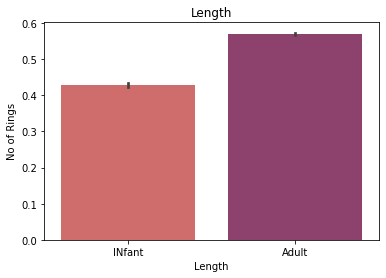

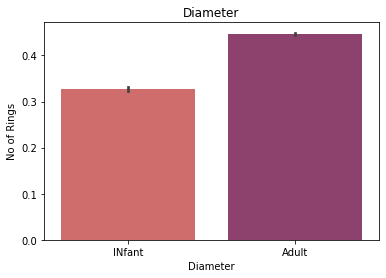

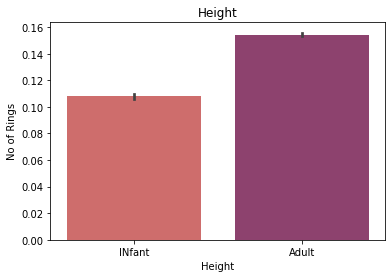

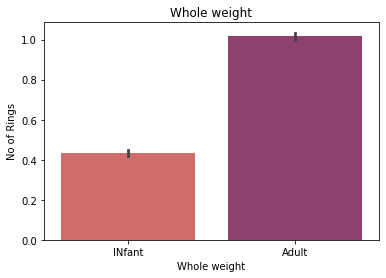

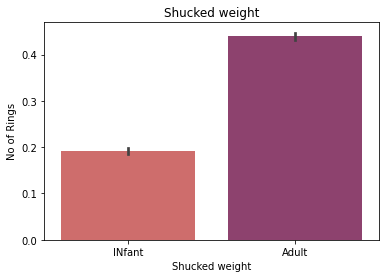

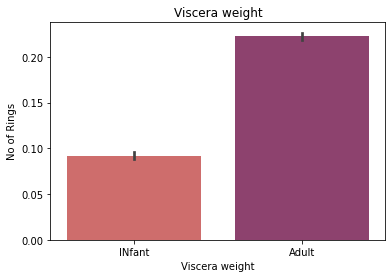

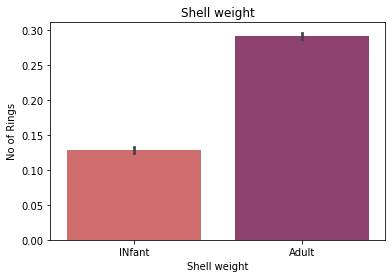

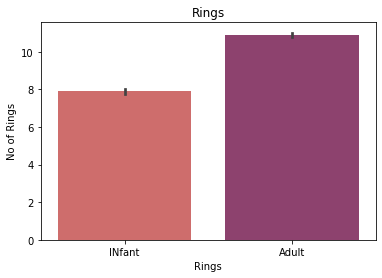

In [435]:
for i in data.columns[1:-1]:
    plt.figure()
    
    sb.barplot(data['Adult/Infannt '],data[i],palette='flare')
    plt.title('Infant/Not INfant VS '+str(i))
    plt.xlabel(str(i))
    plt.ylabel('No of Rings')
    plt.xticks([0,1],['INfant','Adult'])
    plt.title(str(i))

##### Observations:
        - Clear boundaries and distinguish with this column.

<AxesSubplot:xlabel='Rings', ylabel='Adult/Infannt '>

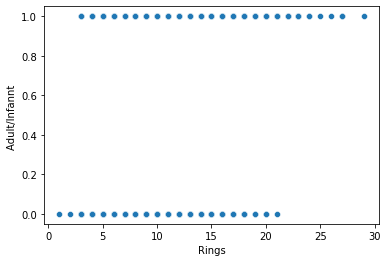

In [436]:
sb.scatterplot(data.Rings,data['Adult/Infannt '])

**WE can say if no of rings are greater than 22, it will be an Adult.**


#### Converting label columns

In [437]:
from sklearn.preprocessing import LabelEncoder

In [438]:
le = LabelEncoder()


In [439]:
data['Sex']  = le.fit_transform(data['Sex']) # f=0, I=1, M=2

#### Multivariante Analysis

<AxesSubplot:>

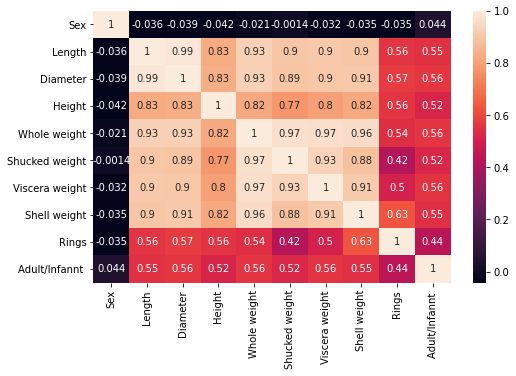

In [440]:
plt.figure(figsize=(8,5))
sb.heatmap(data.corr(),annot=True)

#### OBservations
        - High Multicollinearity Present btween features, linear Regression wont work properly.
        - No of Rings/ Target Variable has High Correlation will all the feature as we have seen before in Bivariante EDA PArt.
        - Target Variable  has low correlation with Sex as i mentioned earlier that M,F category have equal influenct with all the features but when combined M/f and INfant as other Category it have high influence on target vairable and with other Features.
        - WE can Remove the Sex Column as we have transformed into a new Categroy
        
        
#### EXPLORING MULTICOLLINEARITY BETWEEN FEATURES

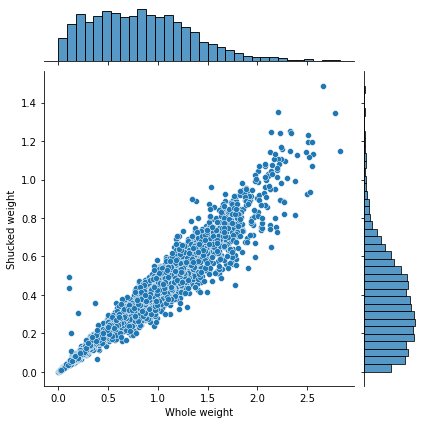

In [507]:
sb.jointplot(data['Whole weight'],data['Shucked weight'])

**Shucked Weight and whole weight have linear relationship**

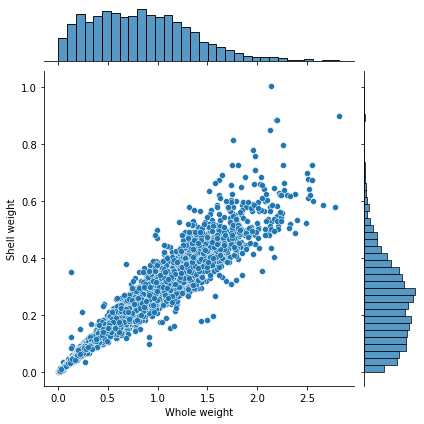

In [503]:
sb.jointplot(data['Whole weight'],data['Shell weight'])

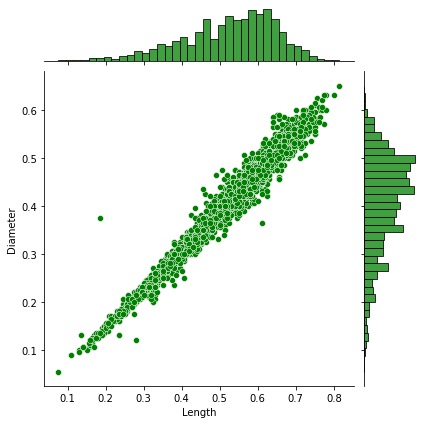

In [505]:
sb.jointplot(data['Length'],data['Diameter'],color='g')

**NOTE:  MULTICOLINEARITY PRESENT BETWEEN FEATURES**

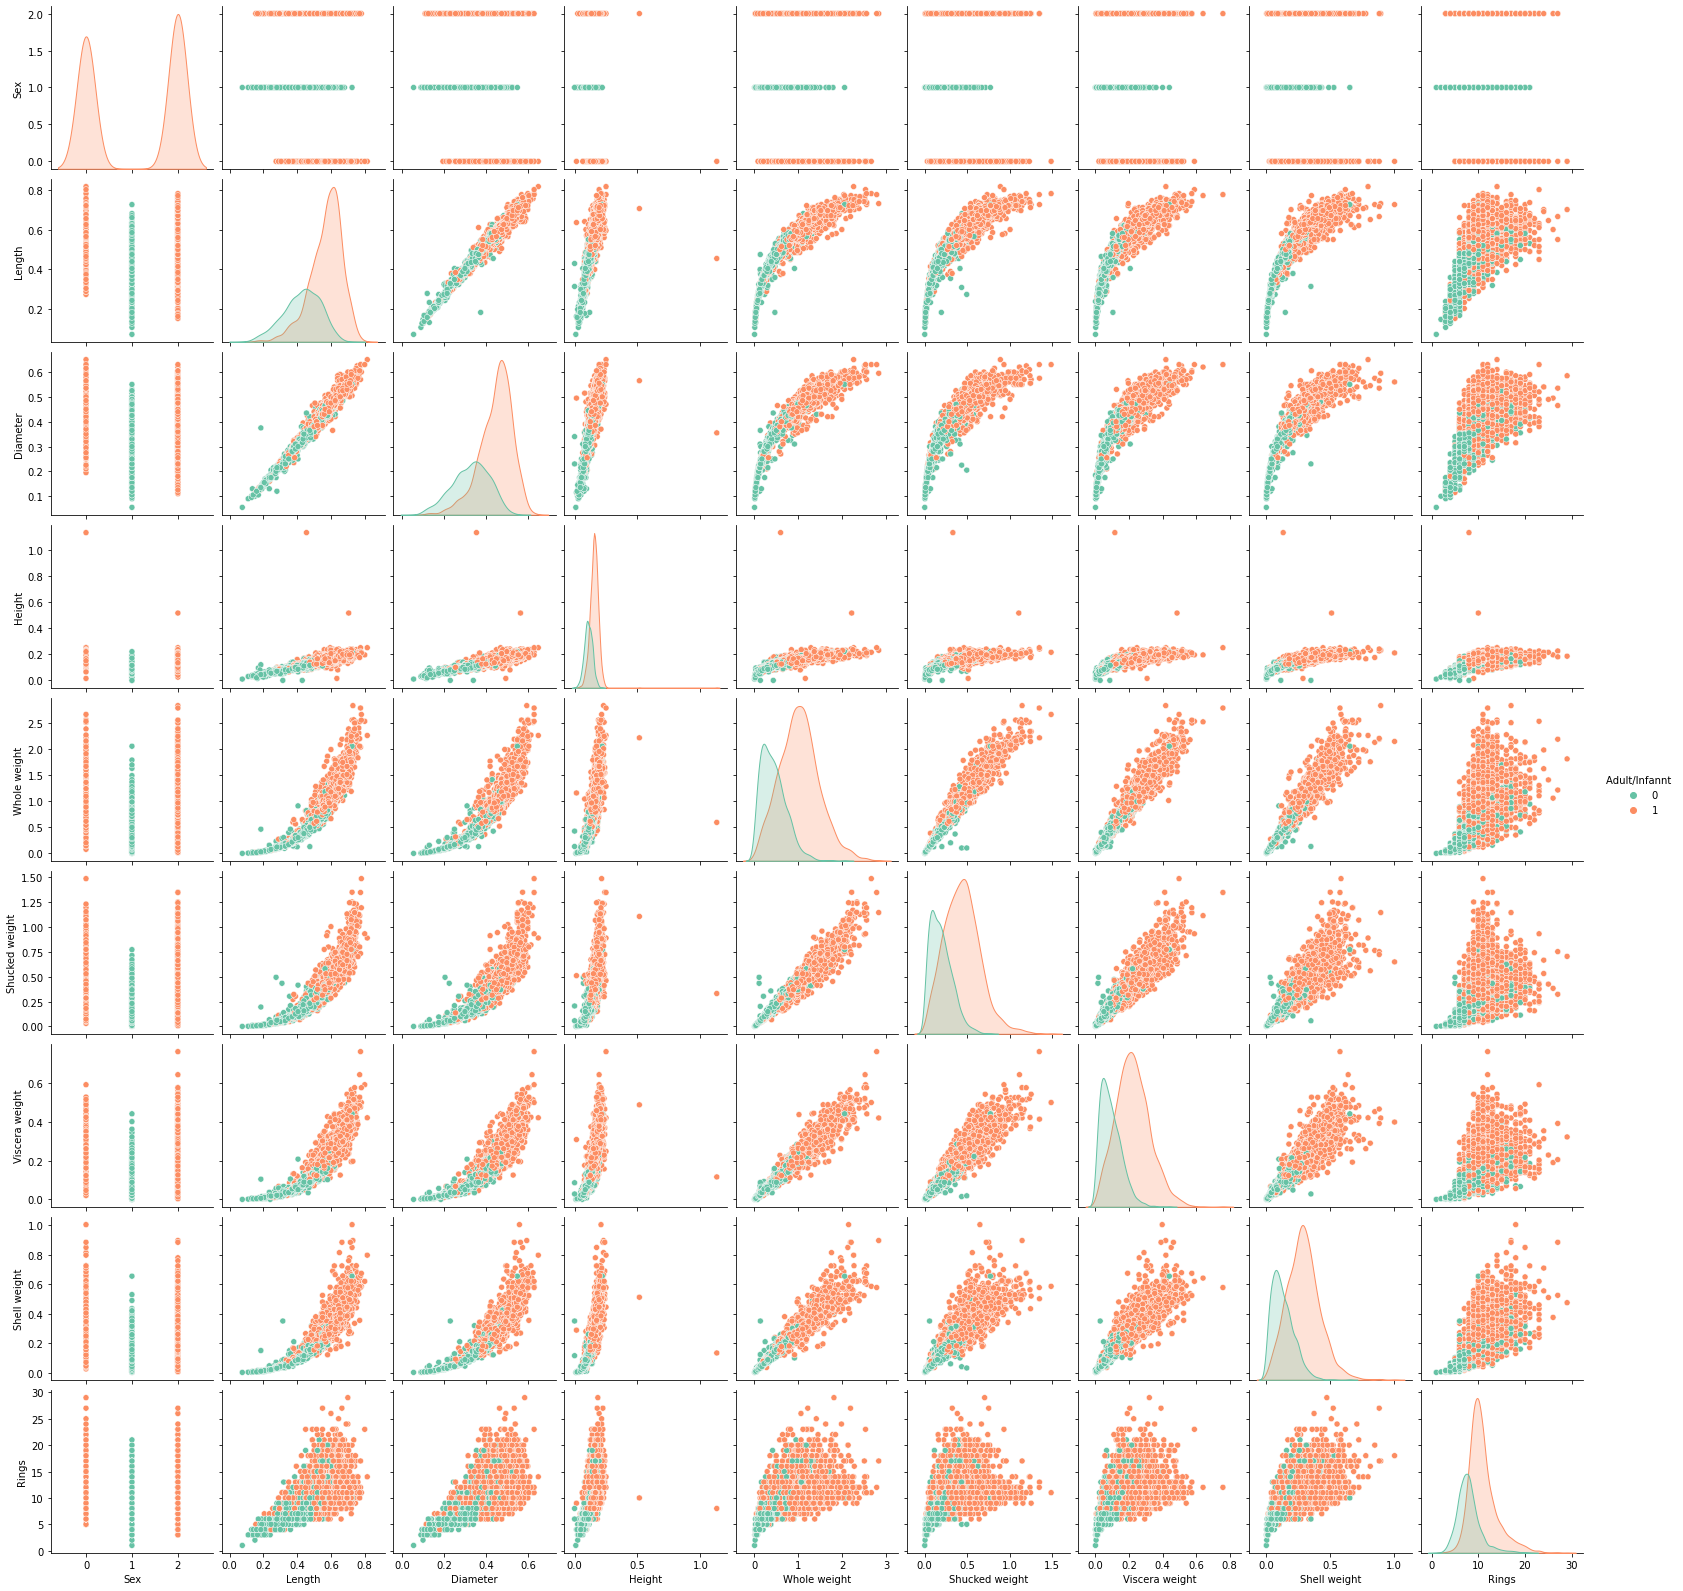

In [444]:
sb.pairplot(data,hue='Adult/Infannt ',palette='Set2')

### Observations:
      -  WE sEe heteroscedasiticty, funnel structure in the graph i.e no constant Variance between target variable and features, Linear regression wont work properly, we need to remove heteroscedacity present.
      -  Data is clearly distinguishable bewtween infants and adults 

### STEP 3: DATA CLEANING

        1. Outlier Treatment
        2. skewness treatment
        3. Scaling of Data
        4. Feature Engineering with PCA

#### Outliers Detection and Treatment

    Outlier Detection with Visual Representation and Statistical analysis and treatment are only done in continous variables.

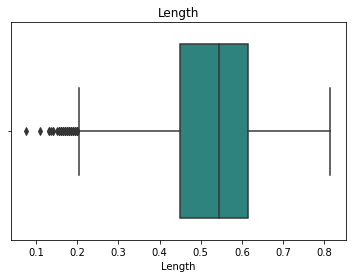

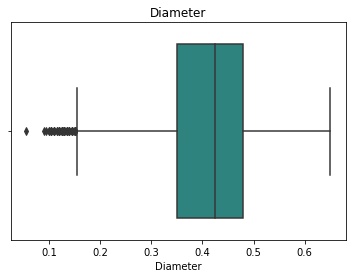

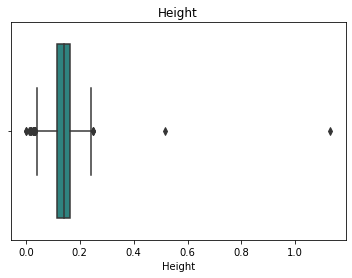

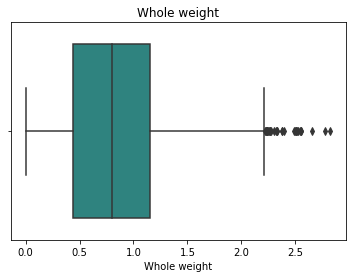

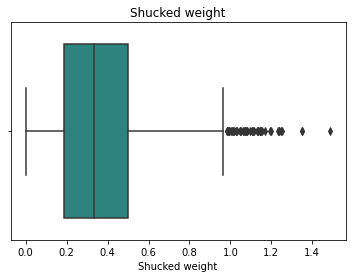

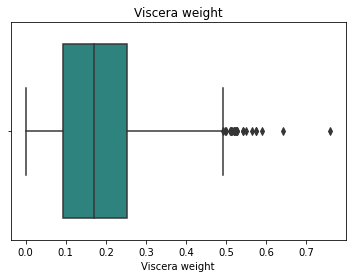

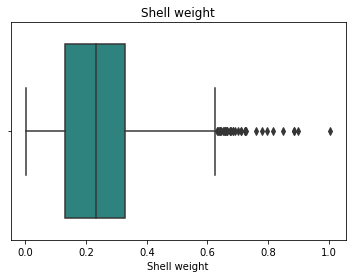

In [347]:
for i in data.columns[1:-2]:
    plt.figure()
    
    sb.boxplot(data[i],palette='viridis')
    plt.title(str(i)+' Boxplot')
    plt.xlabel(str(i))
   
    plt.title(str(i))

#### Observations:
        - Observe outliers all the features.

#### Removing outlier with ZSCORE method.

In [445]:
from scipy.stats import zscore

In [349]:
data.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
Adult/Infannt    -0.765708
dtype: float64

In [350]:
data_out = data

In [351]:
scores = np.abs(zscore(data_out))

In [352]:
len(np.where(scores>3)[0])

200

In [353]:
data_out = data_out[(scores<3).all(axis=1)]

In [354]:
data_out.shape, data.shape

((4027, 10), (4177, 10))

#### Observations:
    - AFter removal of Outliers, 3.5% Data loss occured

In [355]:
data_out.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
Adult/Infannt    -0.731618
dtype: float64

   #### Observations:
         - After Outlier Removal, Skewness Reduced but still a little outlier is observed, we can standardize it with PowerTransformer as it reduces skewness too.

In [356]:
y = data_out['Rings']
X = data_out.drop(['Rings'],axis=1)

In [357]:
from sklearn.preprocessing import PowerTransformer

In [358]:
power = PowerTransformer()

In [359]:
features = power.fit_transform(X)

In [360]:
transformed_data = pd.DataFrame(features,columns=X.columns)

In [361]:
transformed_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Adult/Infannt
0,1.134329,-0.684451,-0.543379,-1.158933,-0.575135,-0.540865,-0.688032,-0.586354,0.699088
1,1.134329,-1.411739,-1.401132,-1.280406,-1.354050,-1.311318,-1.332854,-1.332717,0.699088
2,-1.313068,-0.046219,0.037163,-0.128305,-0.184498,-0.362705,-0.240373,-0.080214,0.699088
3,1.134329,-0.799651,-0.543379,-0.395963,-0.570150,-0.592261,-0.539936,-0.542533,0.699088
4,-0.008746,-1.530577,-1.474343,-1.518600,-1.414577,-1.378735,-1.451548,-1.482926,-1.430434
...,...,...,...,...,...,...,...,...,...
4022,-1.313068,0.289495,0.390420,0.716250,0.277874,0.217107,0.690782,0.227258,0.699088
4023,1.134329,0.545081,0.269661,-0.128305,0.441584,0.534924,0.474179,0.314936,0.699088
4024,1.134329,0.651129,0.705921,1.943633,0.853434,0.901897,1.089651,0.663632,0.699088
4025,-1.313068,0.926064,0.837713,0.286070,0.697385,0.924153,0.876428,0.577520,0.699088


In [362]:
transformed_data.skew()

Sex              -0.174523
Length           -0.082985
Diameter         -0.080956
Height           -0.015962
Whole weight     -0.016797
Shucked weight    0.021815
Viscera weight    0.035902
Shell weight      0.016660
Adult/Infannt    -0.731618
dtype: float64

### PCA: 
        - To visualize how each component is contributing in predicting the abalone age/rings

In [363]:
from sklearn.decomposition import PCA

In [364]:
pca = PCA()

In [365]:
pca.fit(transformed_data,y)

PCA()

<BarContainer object of 9 artists>

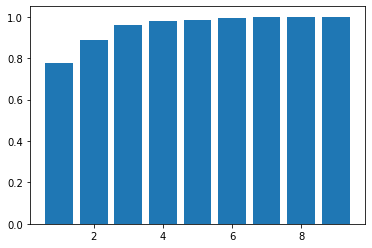

In [446]:
plt.bar(range(1,10),np.cumsum(pca.explained_variance_ratio_))

### NOTE:
    - AS you can see, 4-5 components gives upto more than 95% information about the Data, but as no fo features are not high, no need for transformation or Dimensional reduction needed.

### STEP 4 : MODELING THE DATA
    - WE use all the Features as all the Features are corelated to the Target

In [367]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

In [464]:
randomstate = 0
max_score = 0
lr = SVR()
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(transformed_data,y,test_size=.27,random_state=i)
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    score = r2_score(y_test,pred)    
    if(score>max_score):
        max_score = score
        randomstate  = i
  #  print( 'BEST Random State=',i,' and ITS R2 SCORE of LR MODEL : ',score*100)
print( 'BEST Random State=',randomstate,' and ITS R2 SCORE of LR MODEL : ',max_score*100)

BEST Random State= 18  and ITS R2 SCORE of LR MODEL :  57.39601392787399


In [465]:
x_train,x_test,y_train,y_test = train_test_split(transformed_data,y,test_size=.27,random_state=randomstate)

#### NOTE:
        1. Random State Chosen is 45
#### 4.1 LINEAR REGRESSION MODEL

In [466]:
r2_scores = []
cv_scores = []
rmse_error = []

--------------Linear Regression----------------
R2 score:   0.5546244198324277
Training Score with Cross validation Score:  0.44131344389153765
Mean Squared Error 3.5616618295116536
RMSE Root Mean Squared Error 1.887236558969663
Mean Absolute Error 1.4341403227998166


Text(0, 0.5, 'Y_PREDICTED - Predicted Observations')

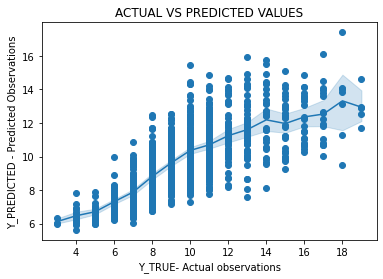

In [467]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print('--------------Linear Regression----------------')
eval_score = r2_score(y_test,pred)
train_score = np.mean(cross_val_score(lr,transformed_data,y,cv=5,scoring='r2'))
print('R2 score:  ',eval_score)
print('Training Score with Cross validation Score: ',train_score)
print('Mean Squared Error',mean_squared_error(y_test,pred))
print('RMSE Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred)))
print('Mean Absolute Error',mean_absolute_error(y_test,pred))
r2_scores.append(eval_score)
cv_scores.append(train_score)
rmse_error.append(np.sqrt(mean_squared_error(y_test,pred)))
plt.figure()
plt.scatter(y_test,pred)
sb.lineplot(y_test,pred)
plt.title('ACTUAL VS PREDICTED VALUES')
plt.xlabel('Y_TRUE- Actual observations')
plt.ylabel('Y_PREDICTED - Predicted Observations')

#### NOTE :
    - Error term: difference between the actual and predicted is  not constant giving rise to Heteroscedasticity means unequal scatter. 
    
    
   #### 4.2 RIDGE MODEL

--------------Ridge MOdel----------------
R2 score :  0.5545883666545255
Training Score with Cross validation Score:  0.44163896564719635
Mean Squared Error 3.5619501462341794
RMSE Root Mean Squared Error 1.8873129433758937
Mean Absolute Error 1.4342754319513085


Text(0, 0.5, 'Y_PREDICTED - Predicted Observations')

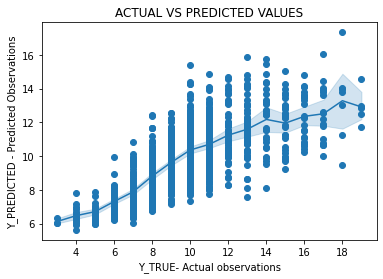

In [468]:
ridge = Ridge()
ridge.fit(x_train,y_train)
pred_ridge = ridge.predict(x_test)
print('--------------Ridge MOdel----------------')
eval_score = r2_score(y_test,pred_ridge)
train_score = np.mean(cross_val_score(ridge,transformed_data,y,cv=5,scoring='r2'))
print('R2 score : ',eval_score)
print('Training Score with Cross validation Score: ',train_score)
print('Mean Squared Error',mean_squared_error(y_test,pred_ridge))
print('RMSE Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_ridge)))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_ridge))
r2_scores.append(eval_score)
cv_scores.append(train_score)
rmse_error.append(np.sqrt(mean_squared_error(y_test,pred_ridge)))
plt.figure()
plt.scatter(y_test,pred_ridge)
sb.lineplot(y_test,pred_ridge)
plt.title('ACTUAL VS PREDICTED VALUES')
plt.xlabel('Y_TRUE- Actual observations')
plt.ylabel('Y_PREDICTED - Predicted Observations')

#### 4.3 LASSO MODEL

--------------LASSO L2 MOdel----------------
R2 score :  0.5545883666545255
Training Score with Cross validation Score:  0.16158723318695647
Mean Squared Error 3.5619501462341794
RMSE Root Mean Squared Error 1.8873129433758937
Mean Absolute Error 1.4342754319513085


Text(0, 0.5, 'Y_PREDICTED - Predicted Observations')

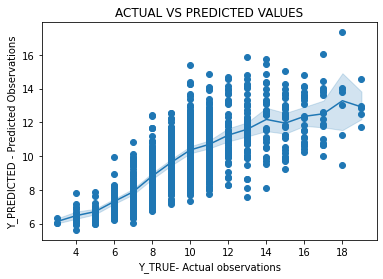

In [469]:
lasso = Lasso()
ridge.fit(x_train,y_train)
pred_lasso = ridge.predict(x_test)
print('--------------LASSO L2 MOdel----------------')
eval_score = r2_score(y_test,pred_lasso)
train_score = np.mean(cross_val_score(lasso,transformed_data,y,cv=5,scoring='r2'))
print('R2 score : ',eval_score)
print('Training Score with Cross validation Score: ',train_score)
print('Mean Squared Error',mean_squared_error(y_test,pred_lasso))
print('RMSE Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_lasso)))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_lasso))
rmse_error.append(np.sqrt(mean_squared_error(y_test,pred_lasso)))
r2_scores.append(eval_score)
cv_scores.append(train_score)
plt.figure()
plt.scatter(y_test,pred_lasso)
sb.lineplot(y_test,pred_lasso)
plt.title('ACTUAL VS PREDICTED VALUES')
plt.xlabel('Y_TRUE- Actual observations')
plt.ylabel('Y_PREDICTED - Predicted Observations')

#### 4.4 ELASTICNET

--------------Elastic Net MOdel----------------
R2 score of Linear Regression  0.3566618932941559
Training Score with Cross validation Score:  0.221967823781596
Mean Squared Error 5.1447651828202625
RMSE Root Mean Squared Error 2.2682074823129086
Mean Absolute Error 1.7240408070889477


Text(0, 0.5, 'Y_PREDICTED - Predicted Observations')

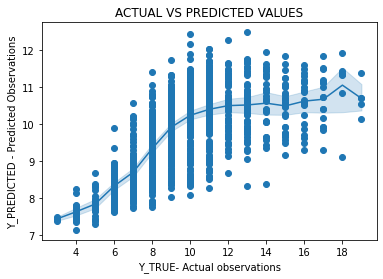

In [470]:
elasticNet = ElasticNet()
elasticNet.fit(x_train,y_train)
pred_en = elasticNet.predict(x_test)
print('--------------Elastic Net MOdel----------------')
eval_score = r2_score(y_test,pred_en)
train_score = np.mean(cross_val_score(elasticNet,transformed_data,y,cv=5,scoring='r2'))
print('R2 score of Linear Regression ',eval_score)
print('Training Score with Cross validation Score: ',train_score)
print('Mean Squared Error',mean_squared_error(y_test,pred_en))
print('RMSE Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_en)))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_en))
r2_scores.append(eval_score)
cv_scores.append(train_score)
rmse_error.append(np.sqrt(mean_squared_error(y_test,pred_en)))
plt.figure()
plt.scatter(y_test,pred_en)
sb.lineplot(y_test,pred_en)
plt.title('ACTUAL VS PREDICTED VALUES')
plt.xlabel('Y_TRUE- Actual observations')
plt.ylabel('Y_PREDICTED - Predicted Observations')

#### 4.5 SVR

--------------SVR MOdel----------------
R2 score : 0.5739601392787399
Training Score with Cross validation Score:  0.4927956578941542
Mean Squared Error 3.407034371328686
RMSE Root Mean Squared Error 1.8458153676163513
Mean Absolute Error 1.3331711513293325


Text(0, 0.5, 'Y_PREDICTED - Predicted Observations')

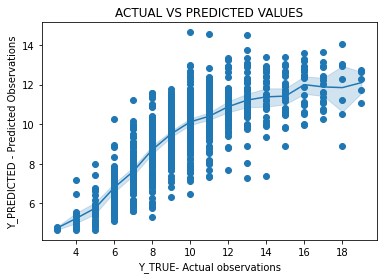

In [471]:
svr = SVR()
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)
print('--------------SVR MOdel----------------')
eval_score = r2_score(y_test,pred_svr)
train_score = np.mean(cross_val_score(svr,transformed_data,y,cv=5,scoring='r2'))
print('R2 score :',eval_score)
print('Training Score with Cross validation Score: ',train_score)
print('Mean Squared Error',mean_squared_error(y_test,pred_svr))
print('RMSE Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_svr)))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_svr))
r2_scores.append(eval_score)
cv_scores.append(train_score)
rmse_error.append(np.sqrt(mean_squared_error(y_test,pred_svr)))
plt.figure()
plt.scatter(y_test,pred_svr)
sb.lineplot(y_test,pred_svr)
plt.title('ACTUAL VS PREDICTED VALUES')
plt.xlabel('Y_TRUE- Actual observations')
plt.ylabel('Y_PREDICTED - Predicted Observations')

#### 4.6 KNearestRegressor

In [472]:
acc=  []
for i  in range(1,35):
    knr = KNeighborsRegressor(n_neighbors=i)
    knr.fit(x_train,y_train)
    pred_knr = knr.predict(x_test)
    acc.append(r2_score(y_test,pred_knr))

Text(0.5, 1.0, 'K Vlaues Vs Evaluation Scores')

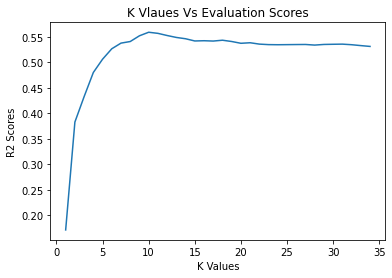

In [508]:
plt.figure()

plt.plot(range(1,35),acc)
plt.xlabel('K Values')
plt.ylabel('R2 Scores')
plt.title('K Vlaues Vs Evaluation Scores')

**Choosing any k value after 10 as it gives same accuracy after k vlaue of 10**

--------------KNearestRegressor MOdel----------------
R2 score : 0.5418284493900386
Training Score with Cross validation Score:  0.4389718113352011
Mean Squared Error 3.663991013071896
RMSE Root Mean Squared Error 1.9141554307505688
Mean Absolute Error 1.4042279411764707


Text(0, 0.5, 'Y_PREDICTED - Predicted Observations')

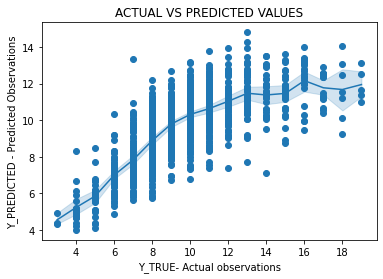

In [474]:
knr = KNeighborsRegressor(n_neighbors=15)
knr.fit(x_train,y_train)
pred_knr = knr.predict(x_test)
print('--------------KNearestRegressor MOdel----------------')
eval_score = r2_score(y_test,pred_knr)
train_score = np.mean(cross_val_score(knr,transformed_data,y,cv=5,scoring='r2'))
print('R2 score :',eval_score)
print('Training Score with Cross validation Score: ',train_score)
print('Mean Squared Error',mean_squared_error(y_test,pred_knr))
print('RMSE Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_knr)))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_knr))
r2_scores.append(eval_score)
cv_scores.append(train_score)
rmse_error.append(np.sqrt(mean_squared_error(y_test,pred_knr)))
plt.figure()
plt.scatter(y_test,pred_knr)
sb.lineplot(y_test,pred_knr)
plt.title('ACTUAL VS PREDICTED VALUES')
plt.xlabel('Y_TRUE- Actual observations')
plt.ylabel('Y_PREDICTED - Predicted Observations')

#### 4.7 DECISION TREE

--------------Decision Tree MOdel----------------
R2 score : 0.4934775450911626
Training Score with Cross validation Score:  0.38277266194273035
Mean Squared Error 4.050652469002829
RMSE Root Mean Squared Error 2.0126232804483877
Mean Absolute Error 1.4865911277130341


Text(0, 0.5, 'Y_PREDICTED - Predicted Observations')

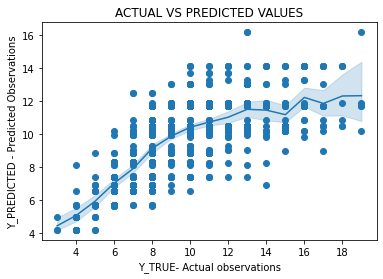

In [475]:
dtr = DecisionTreeRegressor(criterion='mse',max_depth=5,splitter='best')
dtr.fit(x_train,y_train)
pred_dtr = dtr.predict(x_test)
print('--------------Decision Tree MOdel----------------')
eval_score = r2_score(y_test,pred_dtr)
train_score = np.mean(cross_val_score(dtr,transformed_data,y,cv=5,scoring='r2'))
print('R2 score :',eval_score)
print('Training Score with Cross validation Score: ',train_score)
print('Mean Squared Error',mean_squared_error(y_test,pred_dtr))
print('RMSE Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_dtr)))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_dtr))
r2_scores.append(eval_score)
cv_scores.append(train_score)
rmse_error.append(np.sqrt(mean_squared_error(y_test,pred_dtr)))
plt.figure()
plt.scatter(y_test,pred_dtr)
sb.lineplot(y_test,pred_dtr)
plt.title('ACTUAL VS PREDICTED VALUES')
plt.xlabel('Y_TRUE- Actual observations')
plt.ylabel('Y_PREDICTED - Predicted Observations')

#### 4.8 Random Forest Regressor

--------------Random Forest Regressor MOdel----------------
R2 score :  0.5696098894794348
Training Score with Cross validation Score:  0.4564890503240944
Mean Squared Error 3.441823253676471
RMSE Root Mean Squared Error 1.855215150239042
Mean Absolute Error 1.3879871323529414


Text(0, 0.5, 'Y_PREDICTED - Predicted Observations')

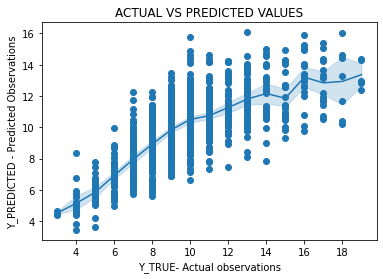

In [476]:
rf = RandomForestRegressor(criterion='mse',n_estimators=100)
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
print('--------------Random Forest Regressor MOdel----------------')
eval_score = r2_score(y_test,pred_rf)
train_score = np.mean(cross_val_score(rf,transformed_data,y,cv=5,scoring='r2'))
print('R2 score : ',eval_score)
print('Training Score with Cross validation Score: ',train_score)
print('Mean Squared Error',mean_squared_error(y_test,pred_rf))
print('RMSE Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_rf)))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_rf))
r2_scores.append(eval_score)
cv_scores.append(train_score)
rmse_error.append(np.sqrt(mean_squared_error(y_test,pred_rf)))
plt.figure()
plt.scatter(y_test,pred_rf)
sb.lineplot(y_test,pred_rf)
plt.title('ACTUAL VS PREDICTED VALUES')
plt.xlabel('Y_TRUE- Actual observations')
plt.ylabel('Y_PREDICTED - Predicted Observations')

### 4.9 ADABOOST REGRESSOR

--------------ADABOOST Regressor MOdel----------------
R2 score :  0.345690373414949
Training Score with Cross validation Score:  0.19570792765177264
Mean Squared Error 5.232504262611743
RMSE Root Mean Squared Error 2.28746677847171
Mean Absolute Error 1.9126303070739978


Text(0, 0.5, 'Y_PREDICTED - Predicted Observations')

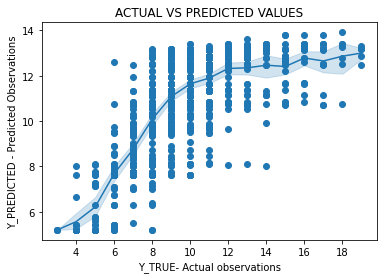

In [477]:
abr = AdaBoostRegressor(n_estimators=50)
abr.fit(x_train,y_train)
pred_abr = abr.predict(x_test)
print('--------------ADABOOST Regressor MOdel----------------')
eval_score = r2_score(y_test,pred_abr)
train_score = np.mean(cross_val_score(abr,transformed_data,y,cv=5,scoring='r2'))
print('R2 score : ',eval_score)
print('Training Score with Cross validation Score: ',train_score)
print('Mean Squared Error',mean_squared_error(y_test,pred_abr))
print('RMSE Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_abr)))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_abr))
r2_scores.append(eval_score)
cv_scores.append(train_score)
rmse_error.append(np.sqrt(mean_squared_error(y_test,pred_abr)))
plt.figure()
plt.scatter(y_test,pred_abr)
sb.lineplot(y_test,pred_abr)
plt.title('ACTUAL VS PREDICTED VALUES')
plt.xlabel('Y_TRUE- Actual observations')
plt.ylabel('Y_PREDICTED - Predicted Observations')

### 4.10 GRADIENTBOOSTING RegressoR

--------------GradientBoosting Regressor MOdel----------------
R2 score of :  0.5796669482135954
Training Score with Cross validation Score:  0.4767097379155386
Mean Squared Error 3.3613971059358607
RMSE Root Mean Squared Error 1.8334113302627593
Mean Absolute Error 1.367280000550012


Text(0, 0.5, 'Y_PREDICTED - Predicted Observations')

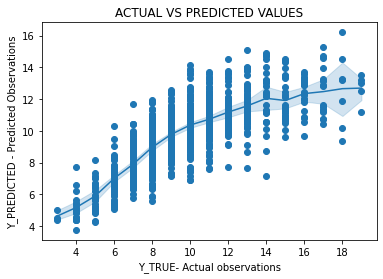

In [478]:
gb = GradientBoostingRegressor(n_estimators=130)
gb.fit(x_train,y_train)
pred_gb = gb.predict(x_test)
print('--------------GradientBoosting Regressor MOdel----------------')
eval_score = r2_score(y_test,pred_gb)
train_score = np.mean(cross_val_score(gb,transformed_data,y,cv=5,scoring='r2'))
print('R2 score of : ',eval_score)
print('Training Score with Cross validation Score: ',train_score)
print('Mean Squared Error',mean_squared_error(y_test,pred_gb))
print('RMSE Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_gb)))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_gb))
r2_scores.append(eval_score)
cv_scores.append(train_score)
rmse_error.append(np.sqrt(mean_squared_error(y_test,pred_gb)))
plt.figure()
plt.scatter(y_test,pred_gb)
sb.lineplot(y_test,pred_gb)
plt.title('ACTUAL VS PREDICTED VALUES')
plt.xlabel('Y_TRUE- Actual observations')
plt.ylabel('Y_PREDICTED - Predicted Observations')

In [479]:
error = []
for i in range(0,10):
    error.append(np.mean(r2_scores[i] - cv_scores[i]))
    

In [480]:
r2_scores

[0.5546244198324277,
 0.5545883666545255,
 0.5545883666545255,
 0.3566618932941559,
 0.5739601392787399,
 0.5418284493900386,
 0.4934775450911626,
 0.5696098894794348,
 0.345690373414949,
 0.5796669482135954]

In [481]:
tab = {
    'R2 Score': r2_scores, 'CV Score': cv_scores,
    'RMSE': rmse_error , 'Error Difference': error
}

In [482]:
table = pd.DataFrame(tab,index=['LinearR','Ridge','Lasso','elasticNet','SVR','KNR','DTC','RF','ADA','GBR'])

In [483]:
table

,R2 Score,CV Score,RMSE,Error Difference
LinearR,0.554624,0.441313,1.887237,0.113311
Ridge,0.554588,0.441639,1.887313,0.112949
Lasso,0.554588,0.161587,1.887313,0.393001
elasticNet,0.356662,0.221968,2.268207,0.134694
SVR,0.573960,0.492796,1.845815,0.081164
KNR,0.541828,0.438972,1.914155,0.102857
DTC,0.493478,0.382773,2.012623,0.110705
RF,0.569610,0.456489,1.855215,0.113121
ADA,0.345690,0.195708,2.287467,0.149982
GBR,0.579667,0.476710,1.833411,0.102957


#### OBSERVTIONS:
        - SVR/GradientBoostingRegressor has highest accuracy score, with SVR having the Least Error term (least biasness)
        -Lowest RMSE is for GBR/SVR
   ### MODEL CHOOSEN FOR MODELLING: SVR

### MODEL : SVR FOR HYPERTUNING PARAMATERS AND EVALUATING OF MODEL

In [399]:
svr = SVR()

In [400]:
params ={
    'kernel': ['linear','rbf'],
    'C': [100,1,.1,10]  ,    
    'gamma':[1,10,.1,.01]
    
}
grid = GridSearchCV(svr,params,cv=5,scoring='r2')

In [401]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [100, 1, 0.1, 10], 'gamma': [1, 10, 0.1, 0.01],
                         'kernel': ['linear', 'rbf']},
             scoring='r2')

In [402]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

--------------SVR MOdel----------------
R2 score : 0.5911735378954885
Training Score with Cross validation Score:  0.5067529272038696
Mean Squared Error 3.2693790809636982
RMSE Root Mean Squared Error 1.808142439345888
Mean Absolute Error 1.315343609293917


Text(0, 0.5, 'Y_PREDICTED - Predicted Observations')

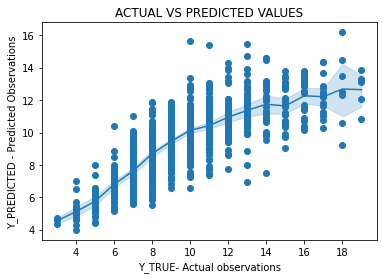

In [484]:
#kernel='rbf',C=100,gamma=.01
svr_final = SVR(kernel='rbf',C=100,gamma=.01)
svr_final.fit(x_train,y_train)
pred_svr = svr_final.predict(x_test)
print('--------------SVR MOdel----------------')
eval_score = r2_score(y_test,pred_svr)
train_score = np.mean(cross_val_score(svr_final,transformed_data,y,cv=5,scoring='r2'))
print('R2 score :',eval_score)
print('Training Score with Cross validation Score: ',train_score)
print('Mean Squared Error',mean_squared_error(y_test,pred_svr))
print('RMSE Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_svr)))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_svr))
r2_scores.append(eval_score)
cv_scores.append(train_score)
rmse_error.append(np.sqrt(mean_squared_error(y_test,pred_svr)))
plt.figure()
plt.scatter(y_test,pred_svr)
sb.lineplot(y_test,pred_svr)
plt.title('ACTUAL VS PREDICTED VALUES')
plt.xlabel('Y_TRUE- Actual observations')
plt.ylabel('Y_PREDICTED - Predicted Observations')

Text(0.5, 6.79999999999999, 'Error')

<Figure size 432x288 with 0 Axes>

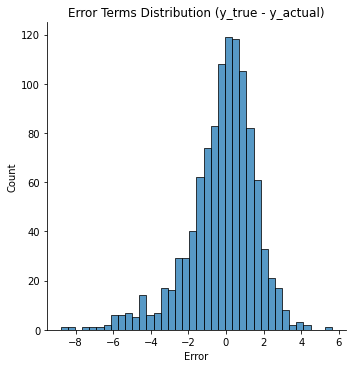

In [495]:
plt.figure()
sb.displot(pred_svr - y_test)
plt.title('Error Terms Distribution (y_true - y_actual)')
plt.xlabel('Error')



Predicted Values follow normal distribution and a little skewness observed in left side as seen, it is right skewed.


### Loading and Saving the model with joblib

In [486]:
import joblib 

In [489]:
joblib.dump(svr_final,'abaloneprediction_svr_model.pk1')

['abaloneprediction_svr_model.pk1']

In [490]:
joblib.load('abaloneprediction_svr_model.pk1')

SVR(C=100, gamma=0.01)

   #### CONCLUSION: 
   
       SVR was used for hypertuning of parameters with final evaluation score of 59.1% accuracy for predicting the Agalone no of rings which in turns +1.5 determines the age of abalone.  THe accuracy Score of this dataSet is low as the data suffers from Heteroscedasticity . wihch leads to increase in biasness of the predicted values.